In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
RANDOM_SEED = 42
N = 500

### 1

In [3]:
np.random.seed(RANDOM_SEED)
classes = [0, 1]

mean = [[0, 0, 0, 0, 0], [1.5, 1.5, 1.5, 1.5, 1.5]]
sigma = [
    [
        [1.0, 0.8, 0.1, 0.0, 0.0],
        [0.8, 1.0, 0.3, 0.0, 0.0],
        [0.1, 0.3, 1.0, 0.5, 0.0],
        [0.0, 0.0, 0.5, 1.0, 0.2],
        [0.0, 0.0, 0.0, 0.2, 1.0],
    ],
    [
        [1.5, -0.7, 0.2, 0.0, 0.0],
        [-0.7, 1.5, 0.4, 0.0, 0.0],
        [0.2, 0.4, 1.5, 0.6, 0.0],
        [0.0, 0.0, 0.6, 1.5, 0.3],
        [0.0, 0.0, 0.0, 0.3, 1.5],
    ],
]

label_features = []
label_class = []

for classe in classes:
    features = np.random.multivariate_normal(mean[classe], sigma[classe], size=N)

    label_features.append(features)
    label_class.append([classe] * N)

### 2

In [4]:
# PCA é uma técnicas de redução de dimensionalidade que necessita da normalização dos dados

In [5]:
x_A, x_B = label_features

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
N_COMPONENTS = 2
pca = PCA(n_components=N_COMPONENTS, random_state=RANDOM_SEED)

In [8]:
X = np.vstack([x_A, x_B])
X_scaled = StandardScaler().fit_transform(X)

In [15]:
pca_global = PCA(n_components=2, random_state=42)
Z_global = pca_global.fit_transform(X_scaled)

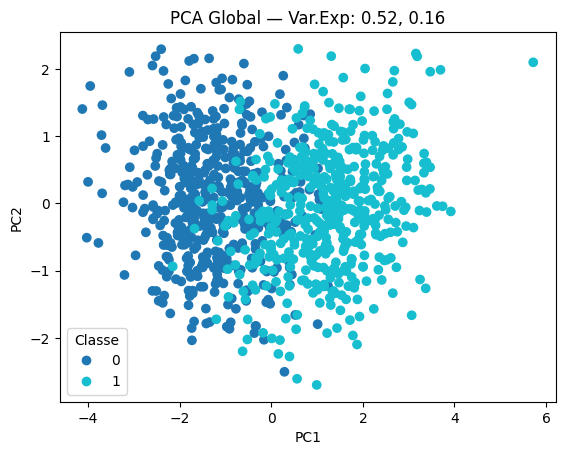

In [16]:
scatter = plt.scatter(Z_global[:, 0], Z_global[:, 1], c=label_class, cmap='tab10')

vr = pca_global.explained_variance_ratio_

plt.title(f'PCA Global — Var.Exp: {vr[0]:.2f}, {vr[1]:.2f}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(*scatter.legend_elements(), title="Classe")

### 3

a) Analisando em 2D as duas classes, A e B, é perceptível que essas possuem dispersões muito parecidas, sendo facilmente confundidas como a mesma classe. Fazendo o exercício de ignonar as cores dos pontos, é muito provável que uma pessoa idenficaria tudo como um cluster só. Além disso, uma linha reta é completamente inviável de ser usada para separar os dois grupos.

b) Por serem classes de 5 dimensões, mesmo abstraindo três das cinco dimensões, e transformando a visualização dos dados em um plano, é muito difícil a resolução da separação estar presente em funções lineares. Para alcançar uma boa forma de separação desses dados, seria provavelmente necessário o uso de todas as suas dimensões e modelos não lineares, sendo capazes de fazer curvas e se adaptar melhor aos dados. Utilizando como solução um MLP, seria possível alcançarmos essa adaptabilidade dos dados, uma vez que suas camadas ocultas possibilitam construirmos fronteiras de decisão por partes, de modo que lidamos com todas as features das duas classes de forma particionada.